In [1]:
import pandas as pd

In [2]:
import numpy as np

In [34]:
import matplotlib
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as Imputer

**Oppimispäiväkirja**
Johdatus datatieteeseen 2021, kesä


Noora Saros <br>
Opiskelijanumero: 245887

Tämä oppimispäiväkirja löytyy julkaistuna <a href="https://github.com/noorasaros/JODA2021_oppimispk/blob/main/oppimispk.ipynb">GitHubista</a>.

### Luento 1:

<p>Ensimmäisellä luennolla käytiin läpi pohjustus siitä, mitä datatiede oikeastaan on ja mikä sen merkitys on. Luennolla käytiin läpi myös olemassa olevia teknologioita, kuten datan ryömintää. Toisaalta käsiteltiin myös, miten harjoitustyö ja oppimispäiväkirja tulisi kurssin aikana toteuttaa. Katsoin luentotallenteen ja vasta jälkikäteen huomasin, että kesän toteutuksen sivuille oli linkattuna vuoden 2019 tallenteet. Teen muut oppimispäiväkirjat kevään 2020 tallenteiden pohjalta, kun löysin oikean linkin Moodelsta. Tämän vuoksi ensimmäisen luennon oppimispäiväkirjassa ei ole palautetta luennosta, vaikka nopealla kelauksella vuosien 2019 ja 2020 toteutuksien ensimmäinen luento on hyvin lähellä toisiaan.</p>

<p>Markdown ja Python olivat itselleni tuttuja kieliä, mutta Jupyter ja sen ajaminen olivat uutta. Itseasiassa aloitin oppimispäiväkirjan alustamisen ennen kuin olin edes katsonut ensimmäisen luennon tallennetta ja päädyin täten käsittelemään ensimmäistä Jupyter-työkirjaani hieman eri tavalla. Asensin Jupyterin omalle koneelleni ja ajoin sen komentorivillä. Käytännössä tämä ratkaisu vastasi Anacondan käyttöä, sillä Jupyter Notebook pyöri edelleen omalla koneellani. Toisaalta olin tyytyväinen tähän ratkaisuun, koska ensinnäkin sain muisteltua itselläni ruosteessa ollutta komentorivin käyttöä ja toisaalta tiedoston säilyttäminen ja ajaminen oli mahdollista omalla koneella. Havaitsin kuitenkin pian, että jo Pandas-kirjaston käytön vuoksi Anacondan asentaminen oikeasti oli suositeltavaa.</p>

<p>Luennolla esitettiin mielenkiintoisia ajatuksesta datatieteestä ja mitä se oikeasti on. Omalla kohdallani tunnistin vahvasti tilastotieteen ja datatieteen yhteyden, joskin datatieteilijä herätti itsessäni enemmän mielikuvan IT-kaverista kuin matemaatikosta. Toisaalta täydellisen datatieteilijän kuvauskin herätti ajatuksia siitä, että datatieteilijän hommahan nimenomaan on esittää datan pohjalta tietoa, jota sitten voidaan hyödyntää. Tähän <i>esittämiseen</i> liittyy toki vahvasti kommunikaatio. Työni osalta olen kuitenkin kohdannut hämmentävän paljon asetelmia, jossa saadun informaation kommunikointi ja itse datan pureskelu toteutetaan joko eri ihmisten tai jopa eri osastojen toimesta. Näinhän se on, että vaaditaan paljon, että yksi ihminen voisi hallita kaikki tarvittavat osa-alueet, mutta ainakaan julkisen puolen organisaatioissa elää oman kokemukseni mukaan hyvin vahvasti oletus, että viestintä on syytä jättää sen alan ammattilaisille ja IT/data-puoli tuottaa vain tietoa.</p>

<p>Datasta saatavan tiedon ja liiketoimintatiedon yhdistäminen ja erityisesti ristiriitaisuus oli mielenkiintoinen näkökulma. Itseasiassa läheinen ystäväni työnkuva on vastata erään yrityksen omasta ohjelmistosta, jonka tarkoitus on tarjota yrityksen myyjille pohja hinnoitteluun. Ohjelman pohjana on yksittäisten komponenttien, marginaalien ja toteutuneiden kauppojen kokonaisuus. Ystäväni on useaan kertaan joutunut tuskastumaan siihen, että myyjät eivät silti noudata ohjelmistosta saatua tietoa, vaan saattavat tehdä tarjouksia niin sanotusti hatusta vetämällä, jolloin myytyjen kokonaisuuksien marginaali saattaa olla heikko tai jopa negatiivinen. Ystävälleni tämä on tietenkin tuskastuttavaa, mutta toisaalta ehkä tässä kontekstissa liiketoimintatiedon ymmärrystä voikin olla se, että joskus "huonojenkin kauppojen" tekeminen yksittäisissä tapauksissa saattaa olla kannattavaa, jos se tarkoittaa potentiaalisesti suurempia ja kannattavampia kauppoja tulevaisuudessa saman asiakkaan kanssa. Kokisin, että tässä datan ja liiketoimintatiedon ymmärtämisessä ja yhdistämisessä on erittäin mielenkiintoisia näkökulmia, joita ei jokaisessa yrityksessä vielä ymmärretä.</p>

In [4]:
# Ensimmäisinä koodipätkinä harjoittelin pandasin ja taulukoiden perustoiminnallisuuksia osana Jupyter-työkirjaa.
# Ideat koodin toteutukseen on saatu luennolta.
# Luetaan csv
df=pd.read_csv('data/listings.csv')

In [5]:
# Näytetään taulukon 5 ensimmäistä riviä, jotta voidaan tutustua dataan.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20083,Unique in Södermalm SOFO Stockholm,75962,Lovisa,NaN,Södermalms,59.30833,18.08615,Entire home/apt,1043,4,12,2014-06-14,0.09,1,364
1,75590,Amazing nature location by a lake,397766,Peter,NaN,Skarpnäcks,59.30117,18.12833,Entire home/apt,949,30,10,2015-07-11,0.16,1,139
2,155220,"Stockholm, new spacoius villa",746396,Madeleine,NaN,Skarpnäcks,59.24615,18.17870,Entire home/apt,1200,3,0,NaN,NaN,2,48
3,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31389,18.06087,Private room,643,3,313,2019-07-11,2.64,2,166
4,170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31702,18.02946,Entire home/apt,634,4,34,2012-08-04,0.56,1,296


In [6]:
# Pivot-taulukko naapurustosta, dropataan id:t
df.pivot_table(df, index=["neighbourhood"], aggfunc=np.mean).drop(columns=['host_id','id'])

,availability_365,calculated_host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,price,reviews_per_month
neighbourhood,,,,,,,,
Bromma,154.369048,2.035714,59.339664,17.943499,6.738095,15.803571,1105.976190,0.717295
Enskede-Årsta-Vantörs,130.793388,3.280992,59.282440,18.059397,5.446281,17.582645,1030.301653,0.696489
Farsta,131.282609,1.141304,59.256054,18.091163,4.282609,15.793478,916.119565,0.623750
Hägersten-Liljeholmens,115.354839,1.383065,59.302652,17.992740,5.459677,18.580645,988.858871,0.712169
Hässelby-Vällingby,123.841121,5.317757,59.369921,17.843794,4.626168,8.719626,881.448598,0.454146
Kungsholmens,145.598131,3.152648,59.332101,18.022327,6.560748,21.283489,1246.822430,1.059431
Norrmalms,142.250681,2.632153,59.341734,18.048983,11.574932,23.288828,1364.310627,0.957352
Rinkeby-Tensta,149.577320,4.958763,59.403579,17.936979,8.639175,11.000000,596.113402,0.532286
Skarpnäcks,143.744526,2.270073,59.283952,18.115187,13.481752,18.335766,883.481752,0.887168


### Luento 2:

<p>Luennon aluksi esiteltiin Data Science Work Flow, joka kuvaa, miten raakadata muuttuu hyödynnettäväksi tiedoksi organisaatiossa. Lisäksi käsiteltiin erilaisia tapoja siivota ja kerätä dataa. Luennolla tutustuttiin erityisesti raapijoihin ja ryömijöihin, joiden avulla dataa saadaan kerättyä.</p>

<p>Itselleni mielenkiintoista oli jälleen luennon alussa esitetyt ajatukset siitä, miten kysymyksiin voidaan vastata datasta saatavan tiedon avulla, mutta usein alkuperäinen kysymyskin saattaa matkalla muuttua, koska datan avulla opitaan ilmiöstä lisää. Tällä on itselleni merkitystä siinä mielessä, että julkisella puolella työskennellessä olen voinut havaita parikin ilmiötä dataan ja sen keräämiseen liittyen. Ensinnäkin valmiissa ostetuissa ohjelmistoissa, joita julkisellakin puolella hyödynnetään, on usein jo valmiiksi sisään rakennettuna datan kerääminen ja sen integroiminen esimerkiksi PowerBI-työkaluun on varsin normaalia. Tämä on mielestäni ehdottomasti lisännyt datan hyödyntämistä julkisella puolella, mutta se on edelleen valitettavan vähäistä. Jos taas puhutaan talon sisäisistä ohjelmistoista (esim. asianhallinta), datan kerääminen on usein unohdettu kokonaan tai kerätty data on niin vääristä asioista, että sen hyödyntäminen tietotarpeisiin on lähes mahdotonta. Itse olen työssäni törmännyt usein tilanteeseen, että käsissäni on järjestelmä, jossa käsitellään tarvittavia tietoja, mutta syvällisemmän datan vetäminen järjestelmästä ulos on mahdotonta. Täten voisin sanoa törmänneeni täysin vastakkaiseenkin ilmiöön: data on laadultaan niin heikkoa, että alkuperäisen kysymyksen monimutkaisuudesta päädytään tulemaan taaksepäin, jotta saavutetaan edes joitakin tietotarpeita. Sinänsä tämä ei liene yllättävää, koska julkisella puolella on vasta herätty tietojohtamisen olemassa oloon.</p>

<p>Ryömijä ja raapija olivat itselleni käsitteitä, joista kuuleminen oli mielenkiintoista, koska termit olivat tuttuja, mutta entuudestaan en tiennyt yhtään niiden takana olevaa logiikkaa. Ryömijä indeksoi netissä olevien sivujen sisältämiä tietoja (kuten Google), kun taas raapija ottaa (esim. ryöminnän pohjalta) sivun ja kaivaa sen rakenteesta tietyt kohdat, jossa haluttu tieto sijaitsee. Ruudun raavinnan kohdalla eettisyyden ja laillisuuden kysymys nostettiin aiheellisesti esiin. Itse koen, että esimerkiksi kilpailijan datan kaivaminen sivuilta ei ehkä kannusta rehelliseen kilpailuun, mutta tieto on julkisesti esillä ja sen raavintaan on olemassa työkalut, joten olisi vaikea kuvitella, että tulevaisuudessa yritykset eivät alkaisi hyödyntää tätä ratkaisua enemmän, enkä ole yllättynyt, että tästä on tullut kilpailija-analyysin yhteyteen oma toimialansa. Powerin hintarobotti on hyvä esimerkki tästä toiminnasta ja Power käyttää kyseistä toimintaa joka mainontana asiakkailleen.</p>

In [7]:
# Jatketaan esimerkiksi valitun datan käsittelyä luennon 2 esimerkein.

# Tarkistetaan, että id on uniikki
df['id'].is_unique

True

In [8]:
# Vaihdetaan id indeksiksi.
df.set_index('id', inplace=True)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
20083,Unique in Södermalm SOFO Stockholm,75962,Lovisa,NaN,Södermalms,59.30833,18.08615,Entire home/apt,1043,4,12,2014-06-14,0.09,1,364
75590,Amazing nature location by a lake,397766,Peter,NaN,Skarpnäcks,59.30117,18.12833,Entire home/apt,949,30,10,2015-07-11,0.16,1,139
155220,"Stockholm, new spacoius villa",746396,Madeleine,NaN,Skarpnäcks,59.24615,18.17870,Entire home/apt,1200,3,0,NaN,NaN,2,48
164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31389,18.06087,Private room,643,3,313,2019-07-11,2.64,2,166
170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31702,18.02946,Entire home/apt,634,4,34,2012-08-04,0.56,1,296


In [9]:
# Vilkaistaan, mitä datatyyppejä on tarjolla. 
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
# Katsotaan millaisia huoneistotyyppejä on millaisilla minimivarausajoilla.
df[['room_type', 'minimum_nights']].head()

,room_type,minimum_nights
id,,
20083,Entire home/apt,4
75590,Entire home/apt,30
155220,Entire home/apt,3
164448,Private room,3
170651,Entire home/apt,4


In [11]:
# Muutetaan aikatieto date-time-muotoon.
df['last_review'] =  pd.to_datetime(df['last_review'], format='%Y%m%dT%H:%M:%S',  errors='raise')

In [12]:
# Tarkistetaan, missä muodossa päivämäärät on.
df['last_review'].head()

id
20083    2014-06-14
75590    2015-07-11
155220          NaT
164448   2019-07-11
170651   2012-08-04
Name: last_review, dtype: datetime64[ns]

In [13]:
# Mikä on tietorakenteen koko?
df.shape

(3145, 15)

In [14]:
# Katsotaan, mitä huonetyyppejä datasta löytyy.
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [15]:
# Ennakoidaan, että neighbourhood_group on turha sarake, eikä sisällä juurikaan arvoja. Tarkistetaan.
df.neighbourhood_group.unique()

array([nan])

In [16]:
# Neighbourhood_group on tyhjä sarake. Dropataan se.
df.drop(columns=['neighbourhood_group'])

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
20083,Unique in Södermalm SOFO Stockholm,75962,Lovisa,Södermalms,59.308330,18.086150,Entire home/apt,1043,4,12,2014-06-14,0.09,1,364
75590,Amazing nature location by a lake,397766,Peter,Skarpnäcks,59.301170,18.128330,Entire home/apt,949,30,10,2015-07-11,0.16,1,139
155220,"Stockholm, new spacoius villa",746396,Madeleine,Skarpnäcks,59.246150,18.178700,Entire home/apt,1200,3,0,NaT,NaN,2,48
164448,Double room in central Stockholm with Wi-Fi,784312,Li,Södermalms,59.313890,18.060870,Private room,643,3,313,2019-07-11,2.64,2,166
170651,Petit Charm Rooftop next to heaven,814021,Marie,Södermalms,59.317020,18.029460,Entire home/apt,634,4,34,2012-08-04,0.56,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51120152,Fin lägenhet central i Stockholm,413672213,Guissella,Älvsjö,59.277239,18.013978,Entire home/apt,10007,1,0,NaT,NaN,1,365
51120494,Mysigt hus i Aspudden,101870217,Richard,Hägersten-Liljeholmens,59.306919,18.005566,Entire home/apt,1100,3,0,NaT,NaN,1,301
51125453,"107 kvm, 4 sovrum, 10 min till Stureplan",195219380,Daniel,Östermalms,59.345074,18.084527,Entire home/apt,3000,7,0,NaT,NaN,1,11


### Luento 3:

<p>Kolmannella luennolla käsiteltiin ohjattua oppimista ja koneoppimista sekä sivuttiin, miten tämä kaikki toimii myös big datalla. Oli mielenkiintoista kuulla prosessista, jonka pohjalta koneoppiminen tapahtuu. Jotenkin itse sitä on ehkä ajatellut vieläkin enemmän ihmislähtöiseksi, mutta niin kuin luennollakin todettiin, aiheesta ja datasta paljon tietävä henkilö pystyy parantamaan koneoppimisella saavutettua mallia ja toisaalta mallin validointikin vaatii ihmisen tarkastamista.</p>

<p>Asiakaspoistuma on asia, joka on tullut jo useilla muillakin kursseilla vastaan ja se tuntuu olevan esimerkki, joka nousee usein esiin, kun puhutaan datalähtöisestä tiedolla johtamisesta. Toisaalta markkinoinnin ja liiketoiminnan teorioidenkin pohjalta voidaan todeta, että uusien asiakkaiden hankkiminen on kalliimpaa kuin vanhojen asiakkaiden pitäminen. Täten asiakaspoistuman ennakoiminen ja vähentäminen on erittäin tärkeää. Sinänsä mielenkiintoista ajatella, että kun itsekin olen saanut esimerkiksi puhelinoperaattoriltani uusia tarjouksia, olen saattanut hyvinkin nousta heidän algoritmeissaan poistumisen riskissä olevana asiakkaana ja tarjouksien lähettäminen lienee toki automatisoitua. Tähän mennessä se on toiminut.</p>

<p>Itselleni ei tullut mieleen sopivia esimerkkejä koneoppimisen demoamisesta, mutta kokisin puhelinoperaattoreiden asiakaspoistuman helposti ymmärrettäväksi esimerkiksi, jota voisi hyöädyntää luennolla enemmänkin. Hervannan kampuksen kurssitarjonnassa on ollut kursseja, joissa kyseistä dataa on käsityönä käsitelty ja ennakoitu, joten luulisi, että näiltä kursseiltakin voisi saada jotain antia myös tälle kurssille. Twitter-esimerkki bottien tunnistamisesta oli varsin hyvä ja ajankohtainen esimerkki.</p>

<p>Palautteena kolmannesta luennosta voisin antaa, että esimerkit ja varsin pikkutarkka esitys siitä, miten oppimispäiväkirjan voi jakaa, olisi syytä olla luennoissa jo aiemmin, esim. toisella luennolla tai sen voisi irrottaa vaikka omaksi videokseen, jonka voisi lisätä omana linkkinään kurssin kotisivuille. Nyt esimerkiksi itse käytin aika paljonkin aikaa ratkaisun kehittämiseen, koska ohjelmoinnin taidot olivat hieman ruosteessa ja kurssin sivuilta ei löytynyt helppoa ohjetta siihen, miten oppimispäiväkirja tulisi jakaa. Varsinkin itsenäisenä opiskeluna toteutettuna ohjeistus oppimispäiväkirjan jakamiseen on hieman kummallisessa paikassa, koska ensimmäiset kaksi osaa oppimispäiväkirjasta pitäisi jo olla tässä vaiheessa toteutettuna, jos kurssia käy läpi kronologisessa järjestyksessä.</p>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145 entries, 20083 to 51141313
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            3143 non-null   object        
 1   host_id                         3145 non-null   int64         
 2   host_name                       3142 non-null   object        
 3   neighbourhood_group             0 non-null      float64       
 4   neighbourhood                   3145 non-null   object        
 5   latitude                        3145 non-null   float64       
 6   longitude                       3145 non-null   float64       
 7   room_type                       3145 non-null   object        
 8   price                           3145 non-null   int64         
 9   minimum_nights                  3145 non-null   int64         
 10  number_of_reviews               3145 non-null   int64         
 

In [40]:
# Jatketaan datan siivoamista. Tämä koodipätkä on kolmannen viikon koodiklinikan esimerkistä.
cols_to_clean = ['name', 'host_id', 'latitude', 'longitude',
                'price', 'minimum_nights']
imputer = Imputer()
df[cols_to_clean] = imputer.fit_transform(df[cols_to_clean])
df[cols_to_clean] = df[cols_to_clean].astype(int)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Unique in Södermalm SOFO Stockholm'

In [18]:
# Lasketaan, paljonko asuntoja on tarjolla missäkin kaupunginosassa.
asunnot_naapurustoissa = df['neighbourhood'].value_counts()
print(asunnot_naapurustoissa)

Södermalms                940
Norrmalms                 367
Kungsholmens              321
Hägersten-Liljeholmens    248
Östermalms                244
Enskede-Årsta-Vantörs     242
Bromma                    168
Skarpnäcks                137
Hässelby-Vällingby        107
Rinkeby-Tensta             97
Farsta                     92
Älvsjö                     81
Skärholmens                58
Spånga-Tensta              43
Name: neighbourhood, dtype: int64


<AxesSubplot:>

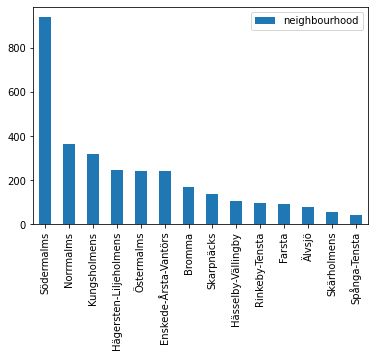

In [31]:
tdf = pd.DataFrame.from_dict(asunnot_naapurustoissa)
tdf.plot(kind='bar')

### Luento 4:

<p>Neljännen luennon alussa esiteltiin prosessimalleja, joilla harjoitustyön ja muidenkin dataan pohjautuvien ongelmien ratkaisemista voidaan toteuttaa. Luennolla esitelty Opportunity Canvas muistuttaa hyvin vahvasti muitakin eri liiketoimintaongelmien ratkomista varten luotuja malleja, mutta mielestäni oli tärkeä havaita, että datatiede on nimenomaan niitä työkaluja, joilla teknisesti voidaan ratkoa tai ainakin tuoda tietoa näiden ongelmien ratkomiseen. Mahdollisuuskehikko oli mielenkiintoinen näkökulma analysoimaan, millaista ongelmaa datalla oikeastaan ollaan ratkomassa.</p>

<p>Ennen luentoa oli tarkoitus tutustua Airbnb-esimerkkianalyysiin. Esimerkki oli mielenkiintoinen ja antoi hyviä ajatuksia siihen, mitä itse voisin harjoitustyössäni tehdä. On kuitenkin todettava, että omalle ymmärrykselleni esimerkki oli vielä liian monimutkainen.</p>

In [ ]:
# joyain

### Luento 5:

Tekstiä

In [ ]:
# jotain

### Luento 6:

Tekstiä

In [ ]:
# jotain

### Luento 7:

Tekstiä

In [ ]:
# jotain